# SRB moments distributions dataset
Notebook for collection and analysis of identified SRB events.

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

In [2]:
path = '../datasets/preprocessed/'
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfevent.head()

,Frame,Time,MotiveExpTimeSecs,visible,speed,session_id
index,,,,,,
0,0,0.000000,0.0,0,0.0,0
1,0,0.000000,0.0,0,0.0,0
2,1,0.004167,0.0,0,0.0,0
3,2,0.008333,0.0,0,0.0,0
4,3,0.012500,0.0,0,0.0,0


In [3]:
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,11,0.045833,-0.056929,0.071534,-0.050089,-0.630078,-0.771081,-0.071057,0,1,-96.434320,146.698244,NaN
2,12,0.050000,-0.056841,0.071633,-0.050048,-0.629274,-0.772078,-0.063293,0,1,-95.743525,165.777747,NaN
3,13,0.054167,-0.056751,0.071736,-0.050003,-0.628491,-0.773053,-0.054848,0,1,-94.987501,181.431205,NaN
4,14,0.058333,-0.056654,0.071847,-0.049960,-0.627633,-0.774084,-0.045938,0,1,-94.186162,192.352190,NaN
5,15,0.062500,-0.056555,0.071962,-0.049917,-0.626826,-0.775066,-0.036472,0,1,-93.329980,205.467215,NaN


In [4]:
df0 = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df0.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed
0,11,0.045833,-0.056929,0.071534,-0.050089,-0.630078,-0.771081,-0.071057,0,1,-96.434320,146.698244,NaN,0.0,0,0.0
1,12,0.050000,-0.056841,0.071633,-0.050048,-0.629274,-0.772078,-0.063293,0,1,-95.743525,165.777747,NaN,0.0,0,0.0
2,13,0.054167,-0.056751,0.071736,-0.050003,-0.628491,-0.773053,-0.054848,0,1,-94.987501,181.431205,NaN,0.0,0,0.0
3,14,0.058333,-0.056654,0.071847,-0.049960,-0.627633,-0.774084,-0.045938,0,1,-94.186162,192.352190,NaN,0.0,0,0.0
4,15,0.062500,-0.056555,0.071962,-0.049917,-0.626826,-0.775066,-0.036472,0,1,-93.329980,205.467215,NaN,0.0,0,0.0


In [5]:
df = pd.DataFrame()
for name, dd in df0.groupby('session_id'):
    dd['UM'] = dd['U'].rolling(window=5, center=True).mean().values
    df = pd.concat([df, dd], axis=0, ignore_index=True)
    
df.head()

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,11,0.045833,-0.056929,0.071534,-0.050089,-0.630078,-0.771081,-0.071057,0,1,-96.434320,146.698244,NaN,0.0,0,0.0,NaN
1,12,0.050000,-0.056841,0.071633,-0.050048,-0.629274,-0.772078,-0.063293,0,1,-95.743525,165.777747,NaN,0.0,0,0.0,NaN
2,13,0.054167,-0.056751,0.071736,-0.050003,-0.628491,-0.773053,-0.054848,0,1,-94.987501,181.431205,NaN,0.0,0,0.0,178.345320
3,14,0.058333,-0.056654,0.071847,-0.049960,-0.627633,-0.774084,-0.045938,0,1,-94.186162,192.352190,NaN,0.0,0,0.0,192.652984
4,15,0.062500,-0.056555,0.071962,-0.049917,-0.626826,-0.775066,-0.036472,0,1,-93.329980,205.467215,NaN,0.0,0,0.0,203.820254


## Experiment 2

In [6]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]

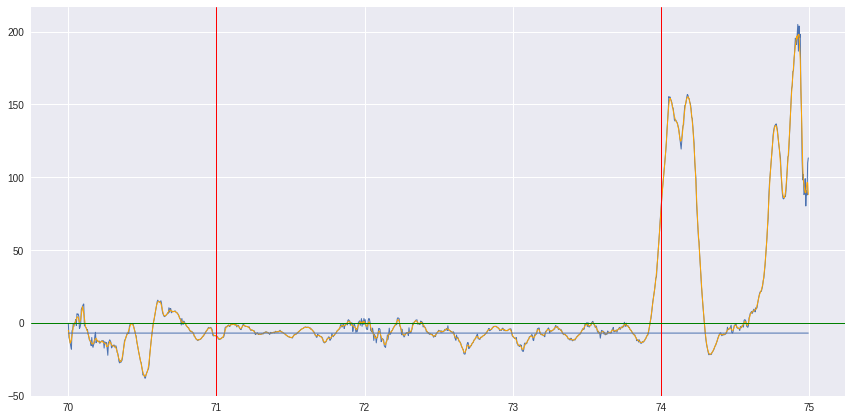

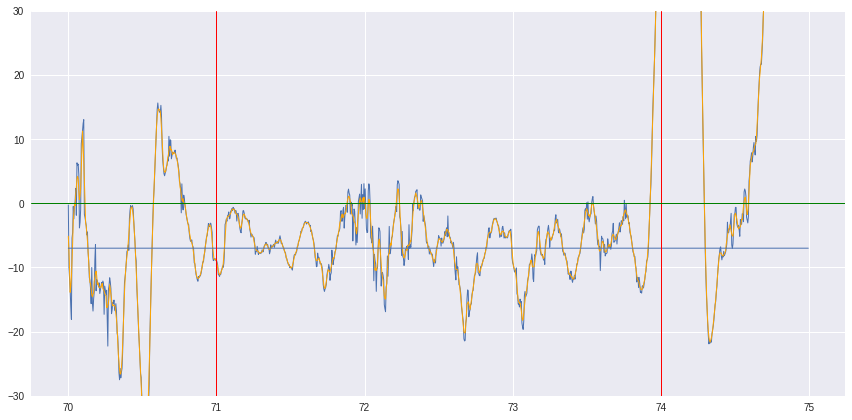

In [7]:
#  71, 73
dpart = dd2[(dd2['Time']>70) & (dd2['Time']<75)]
xmin, xmax = 71, 74

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='orange');

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='orange');

g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [8]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

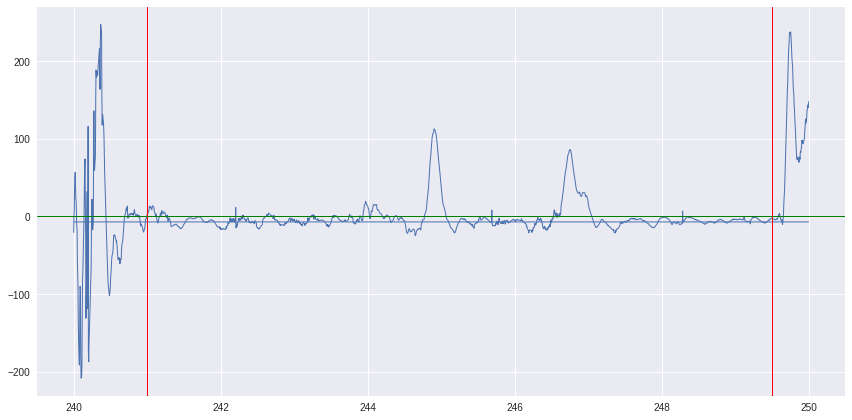

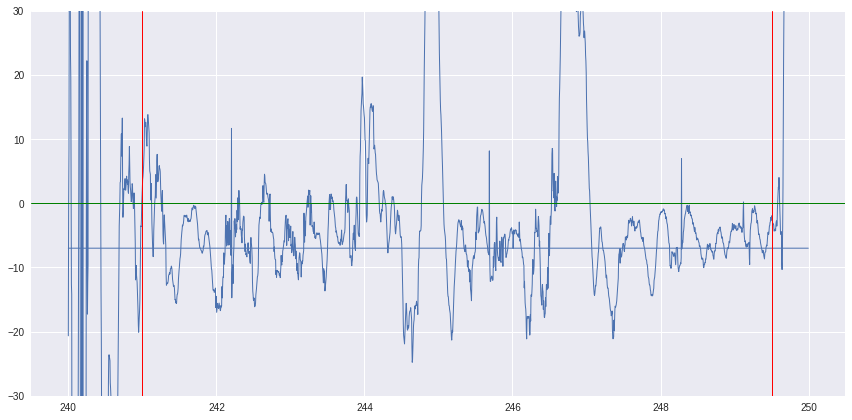

In [9]:

## 247, 249
dpart = dd2[(dd2['Time']>240) & (dd2['Time']<250)]
xmin, xmax = 241, 249.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [10]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

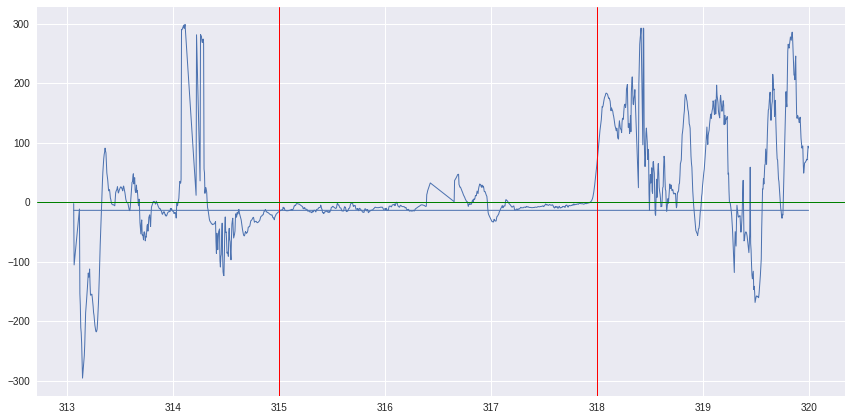

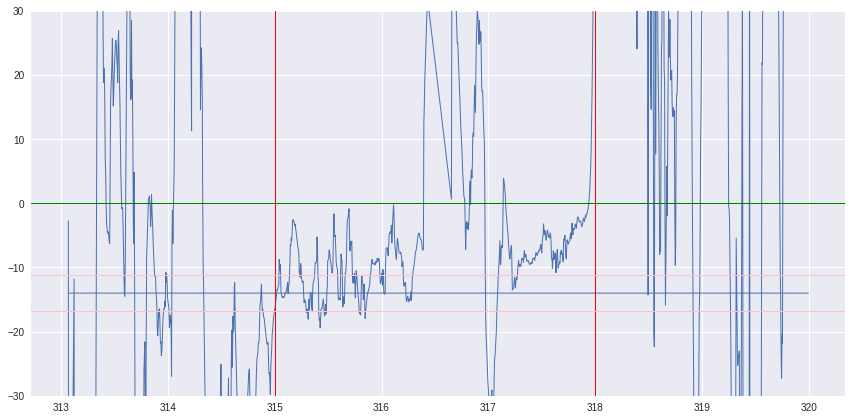

In [11]:
## 315, 317
dpart = dd2[(dd2['Time']>313) & (dd2['Time']<320)]
xmin, xmax = 315, 318

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-11.2, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');


In [12]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

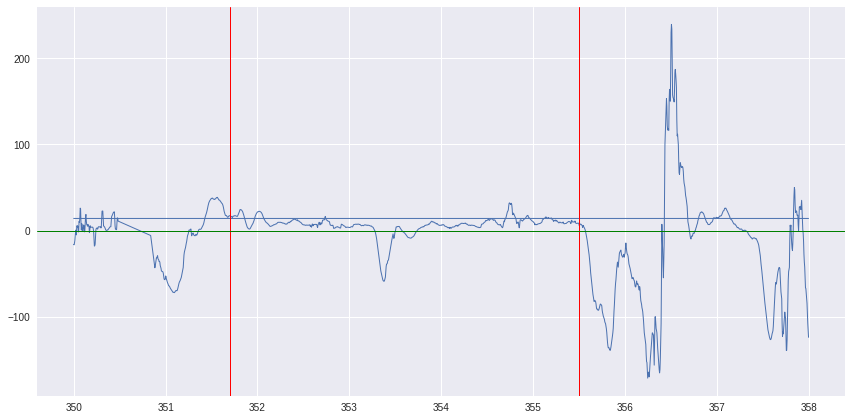

In [13]:
## 351, 356
dpart = dd2[(dd2['Time']>350) & (dd2['Time']<358)]
xmin, xmax = 351.7, 355.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [14]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

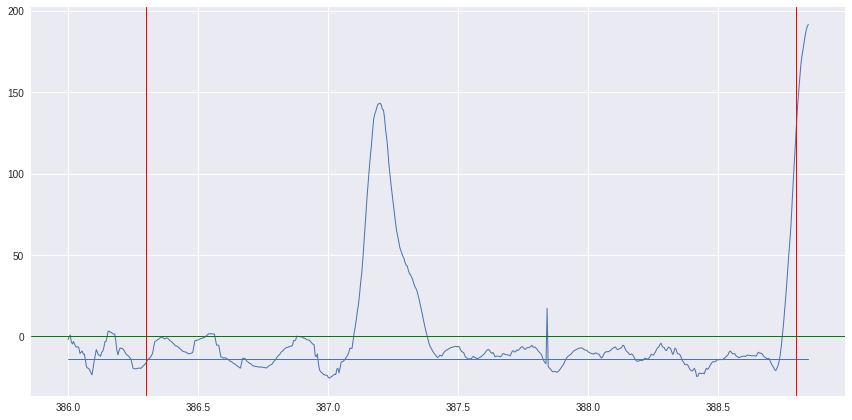

In [15]:
## 386, 388
dpart = dd2[(dd2['Time']>386) & (dd2['Time']<388.85)]
xmin, xmax = 386.3, 388.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [16]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

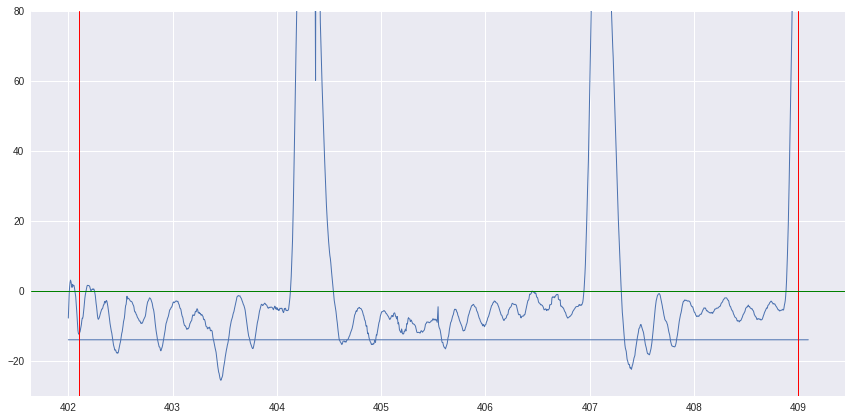

In [17]:
## 402, 407
dpart = dd2[(dd2['Time']>402) & (dd2['Time']<409.1)]
xmin, xmax = 402.1, 409

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-30,80])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [18]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

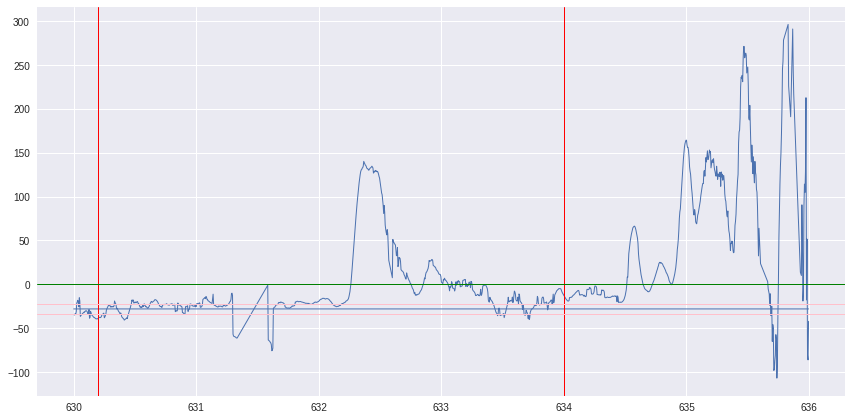

In [19]:
## 630, 632, 633, 634
dpart = dd2[(dd2['Time']>630) & (dd2['Time']<636)]
xmin, xmax = 630.2, 634

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-33.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-22.4, alpha=1, linewidth=1, color='pink');


In [20]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

## Experiment 4

In [21]:
dfSRB4 = pd.DataFrame()
dd4 = df[df['session_id']==4]

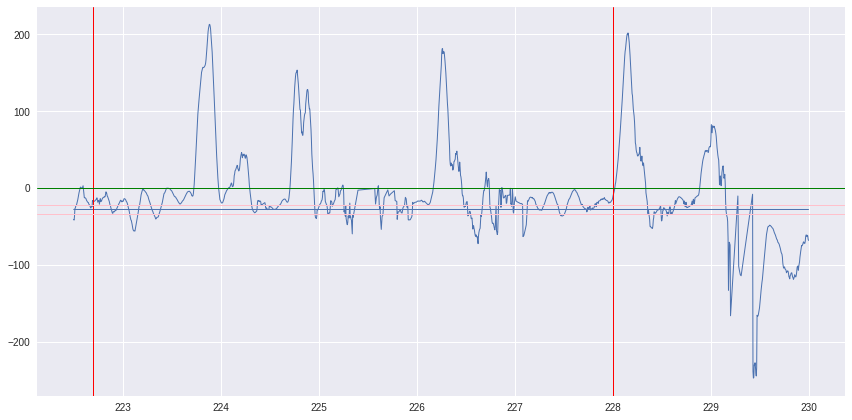

In [22]:
# 221, 228
dpart = dd4[(dd4['Time']>222.5) & (dd4['Time']<230)]
xmin, xmax = 222.7, 228

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-33.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-22.4, alpha=1, linewidth=1, color='pink');


In [23]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

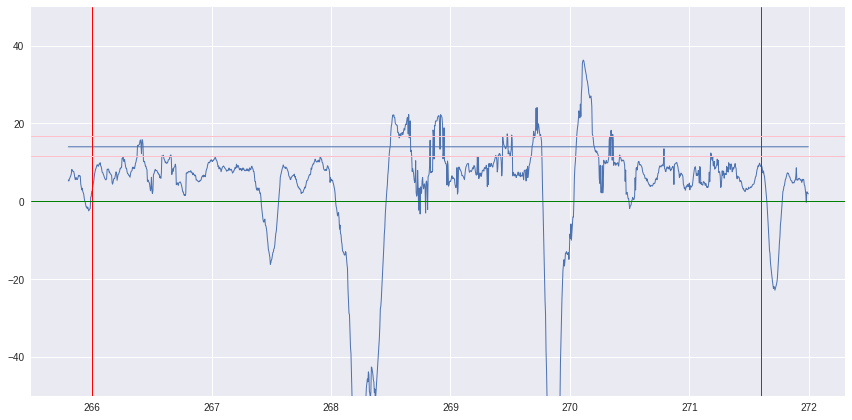

In [24]:
# 267, 270
dpart = dd4[(dd4['Time']>265.8) & (dd4['Time']<272)]
xmin, xmax = 266, 271.6

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');


In [25]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

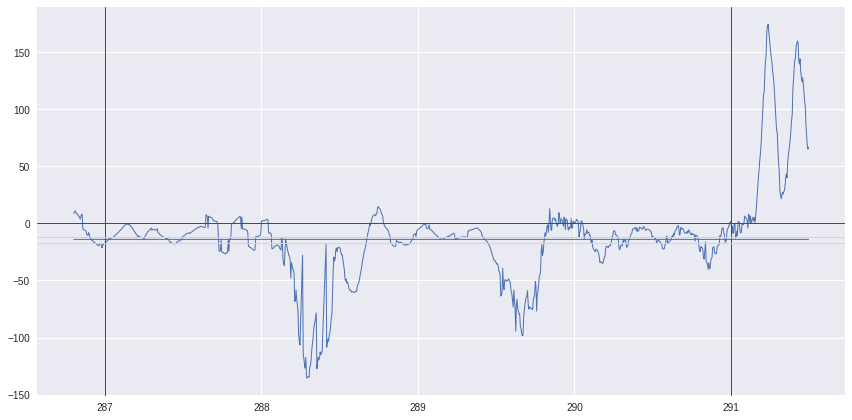

In [26]:
# 287, 291
dpart = dd4[(dd4['Time']>286.8) & (dd4['Time']<291.5)]
xmin, xmax = 287, 291

g = sns.FacetGrid(data=dpart, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=-11.6, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');


In [27]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

## Experiment 5

In [28]:
dfSRB5 = pd.DataFrame()
dd5 = df[df['session_id']==5]

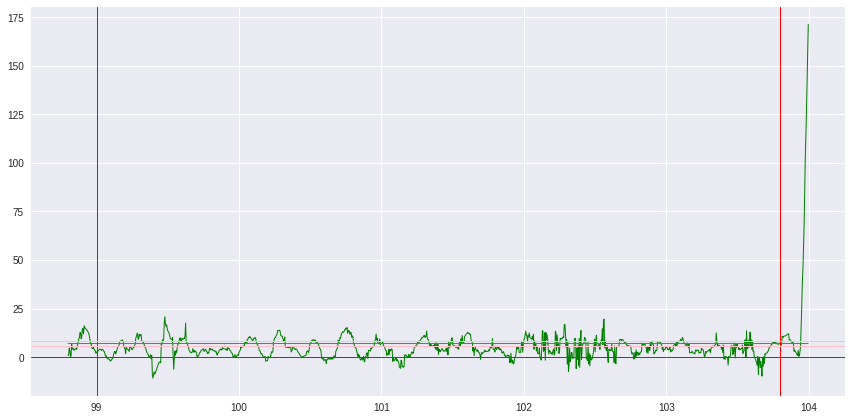

In [29]:
#  99, 104
dpart = dd5[(dd5['Time']>98.8) & (dd5['Time']<104)]
xmin, xmax = 99, 103.8

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=8.4, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=5.6, alpha=1, linewidth=1, color='pink');


In [30]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

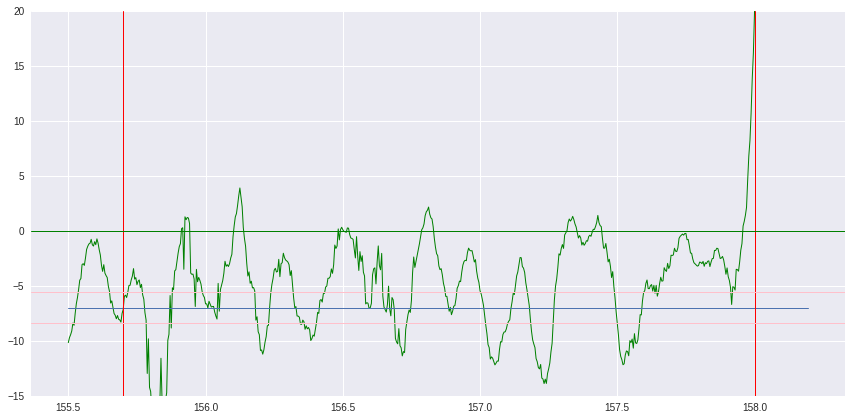

In [31]:
# 155, 157
dpart = dd5[(dd5['Time']>155.5) & (dd5['Time']<158.2)]
xmin, xmax = 155.7, 158

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-15,20])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=-8.4, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-5.6, alpha=1, linewidth=1, color='pink');


In [32]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

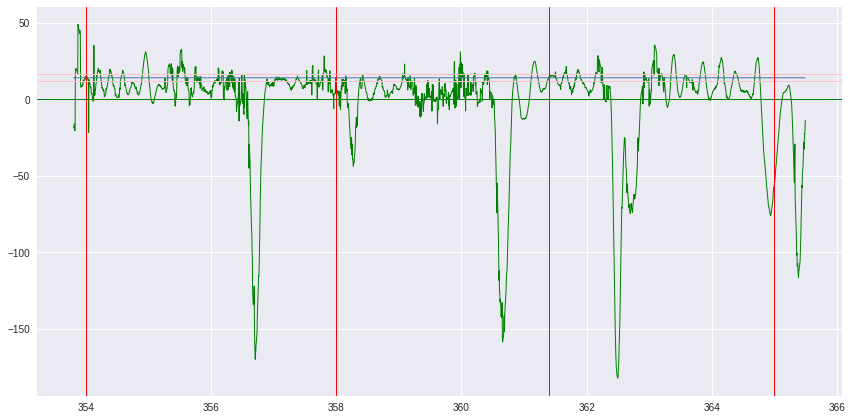

In [33]:
# 355, 365
dpart = dd5[(dd5['Time']>353.8) & (dd5['Time']<365.5)]
xmin, xmax = 354, 358

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

xmin, xmax = 361.4, 365
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

## Experiment 6

In [34]:
dfSRB6 = pd.DataFrame()
dd6 = df[df['session_id']==6]

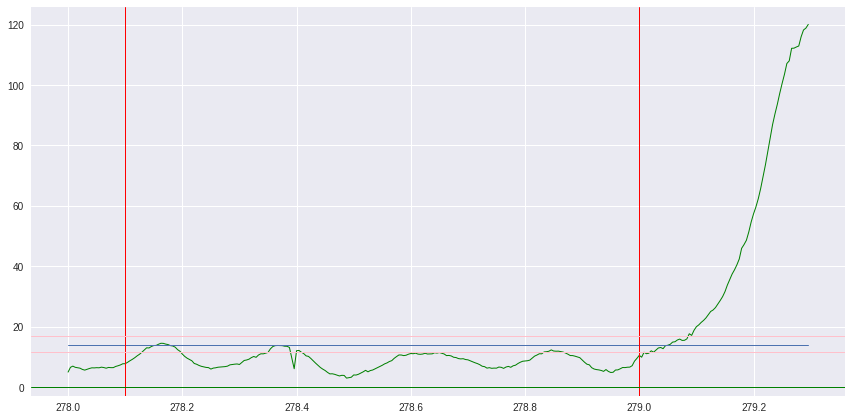

In [35]:
# 278, 279
dpart = dd6[(dd6['Time']>278) & (dd6['Time']<279.3)]
xmin, xmax = 278.1, 279

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.6, alpha=1, linewidth=1, color='pink');


In [36]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

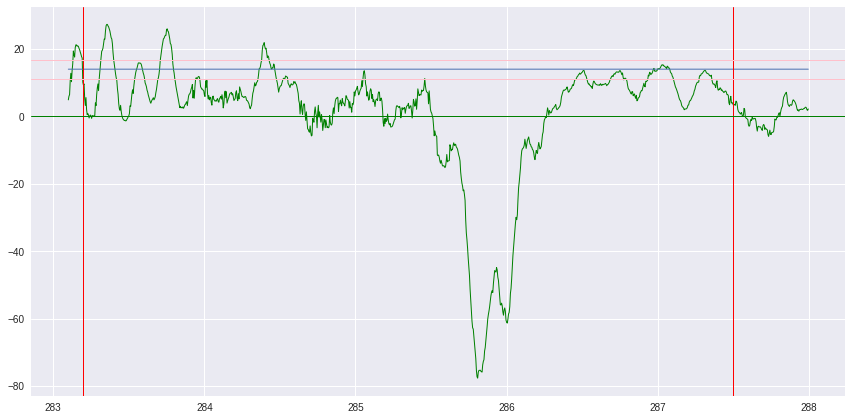

In [37]:
# 281, 283
dpart = dd6[(dd6['Time']>283.1) & (dd6['Time']<288)]
xmin, xmax = 283.2, 287.5

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');

g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=11.2, alpha=1, linewidth=1, color='pink');


In [38]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

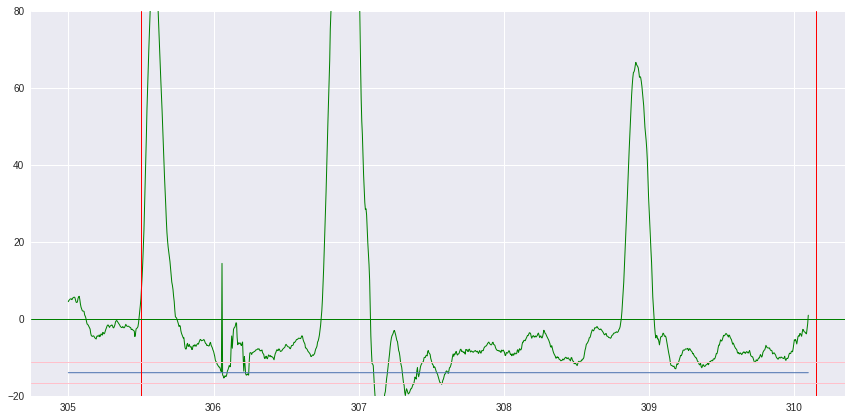

In [39]:
# 305, 310
dpart = dd6[(dd6['Time']>305) & (dd6['Time']<310.1)]
xmin, xmax = 305.5, 310.15

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-20,80])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-16.8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-11.2, alpha=1, linewidth=1, color='pink');


In [40]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

## Experiment 7

In [41]:
dfSRB7 = pd.DataFrame()
dd7 = df[df['session_id']==7]

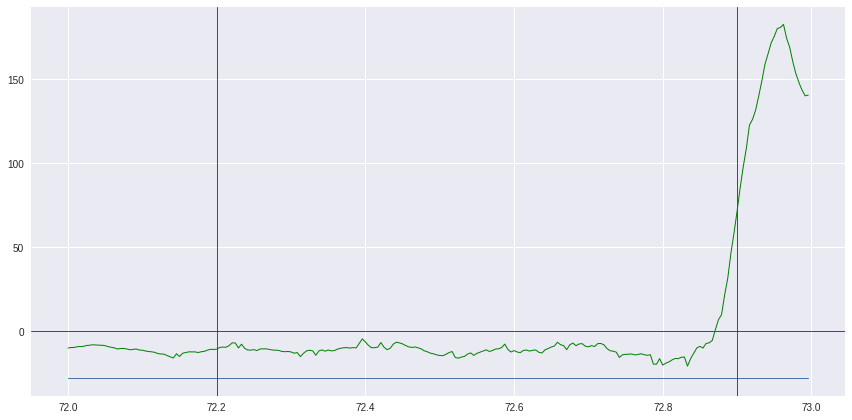

In [42]:
# 71, 73
dpart = dd7[(dd7['Time']>72) & (dd7['Time']<73)]
xmin, xmax = 72.2, 72.9

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [43]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

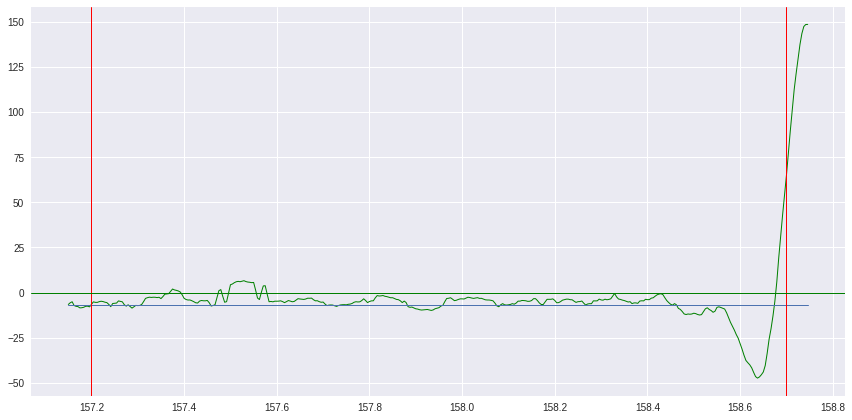

In [44]:
# 157, 159
dpart = dd7[(dd7['Time']>157.15) & (dd7['Time']<158.75)]
xmin, xmax = 157.2, 158.7

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [45]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

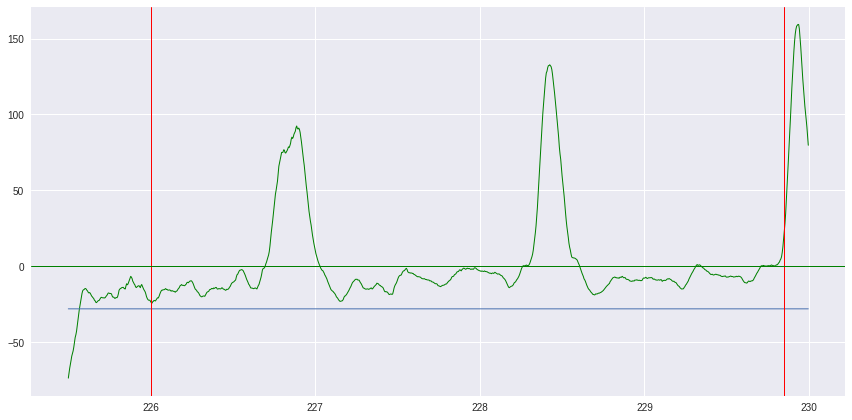

In [46]:
# 225, 230
dpart = dd7[(dd7['Time']>225.5) & (dd7['Time']<230)]
xmin, xmax = 226, 229.85

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


In [47]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

## Experiments combined - visualization

In [48]:
dfSRB = pd.DataFrame()
dfSRB = pd.concat([dfSRB, dfSRB2], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB4], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB5], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB6], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB7], axis=0, ignore_index=True)

In [49]:
dfSRB.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,17040,71.000005,0.072329,0.095311,-0.038305,0.941758,-0.274100,-0.194391,2,1,101.662805,-8.831032,4.116140,59.129167,1,-7.0,-9.034888
1,17041,71.004171,0.072389,0.095342,-0.038322,0.942177,-0.273044,-0.193823,2,1,101.624604,-9.169660,3.963093,59.129167,1,-7.0,-9.473965
2,17042,71.008338,0.072449,0.095373,-0.038338,0.942595,-0.272015,-0.193222,2,1,101.584527,-9.617685,3.825573,59.129167,1,-7.0,-9.977606
3,17043,71.012505,0.072538,0.095410,-0.038338,0.943202,-0.270335,-0.192552,2,1,101.538236,-11.108903,3.821506,59.129167,1,-7.0,-10.493959
4,17044,71.016671,0.072630,0.095448,-0.038339,0.943839,-0.268536,-0.191885,2,1,101.491741,-11.160748,3.659302,59.129167,1,-7.0,-10.861097


In [50]:
len(dfSRB) * 100/ len(dfratv)

1.204946095974649

In [51]:
l, lsrb = {}, {}
for i, dd in dfratv.groupby('session_id'):
    l[i] = len(dd) 
    
for i, dd in dfSRB.groupby('session_id'):
    print(i, len(dd) * 100/l[i])

2 4.299458809380638
4 2.364332048767777
6 1.6433802307547865
7 1.444206744985799


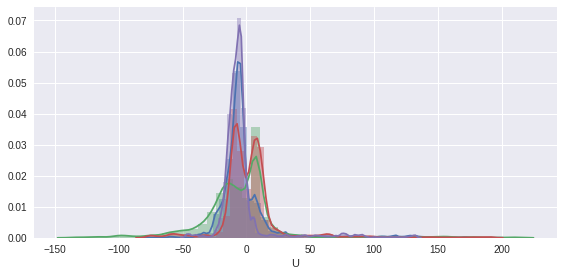

In [52]:
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'U');

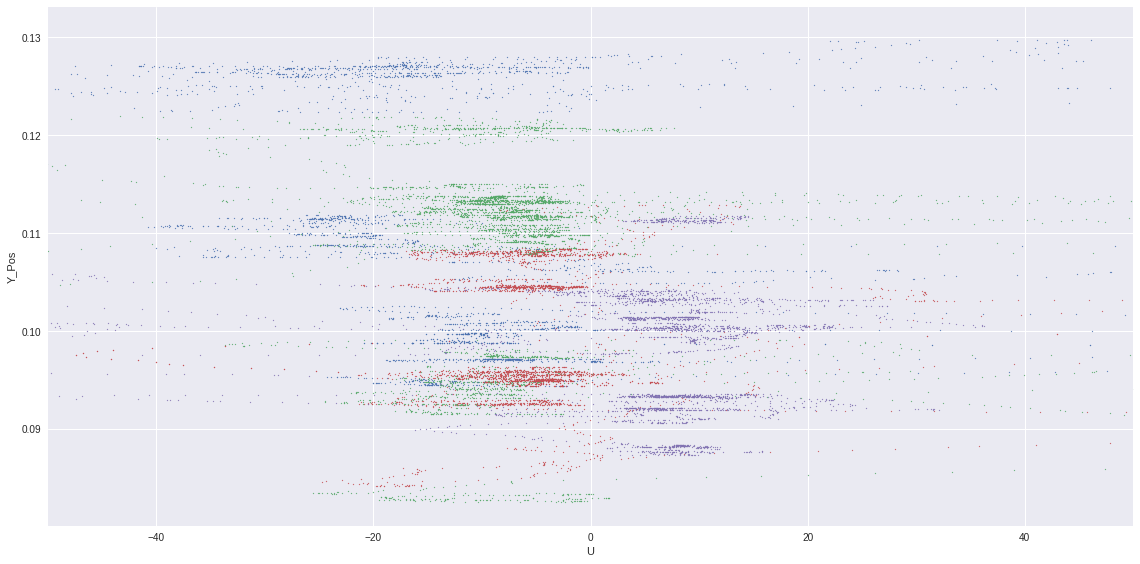

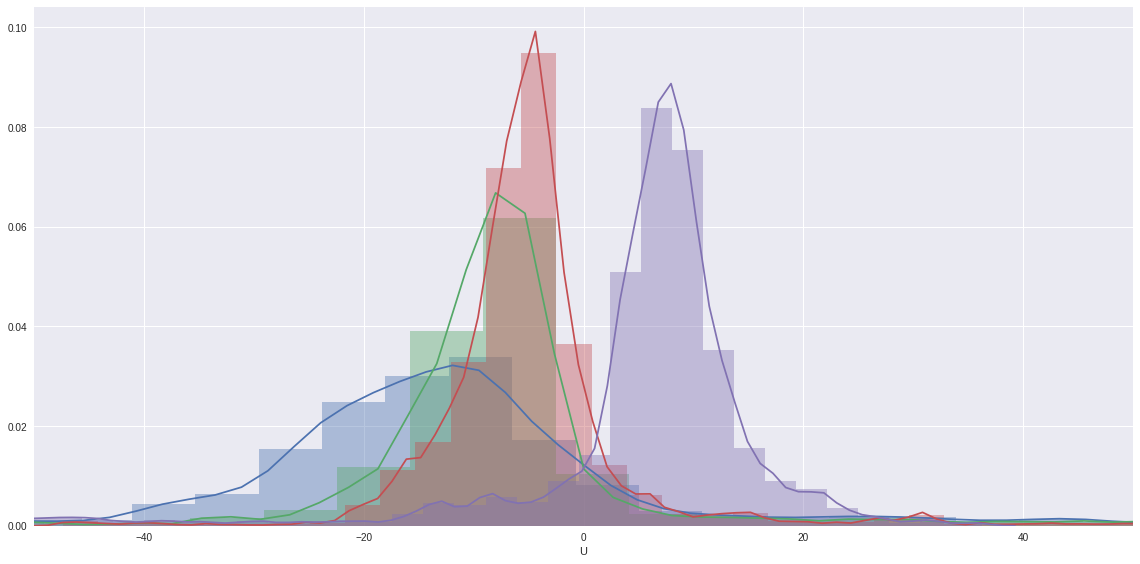

In [53]:
g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.8, s=1);

g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(sns.distplot, 'U');


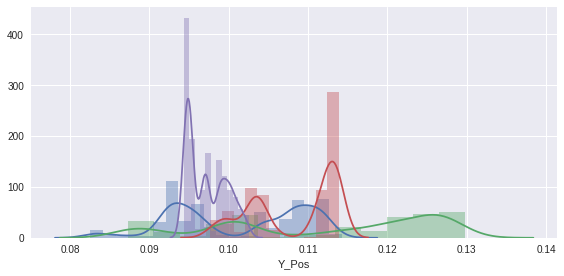

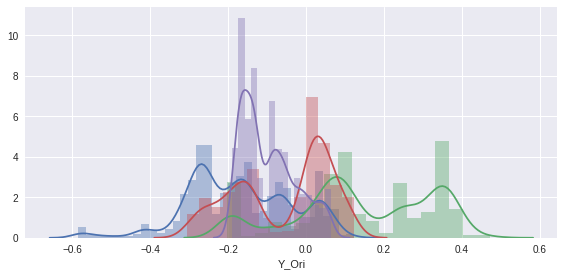

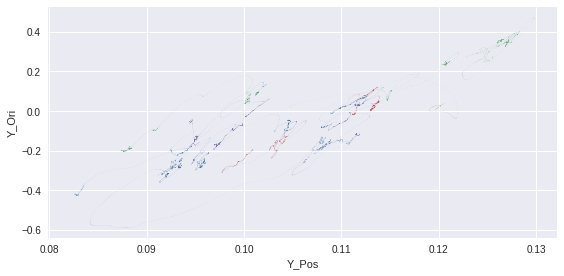

In [54]:
# postiion distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

# oritentation distribution visualization 
g = sns.FacetGrid(hue='session_id', data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

# scatter between orientation and position
g = sns.FacetGrid( data=dfSRB, size=4, aspect=2, hue='session_id')
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);

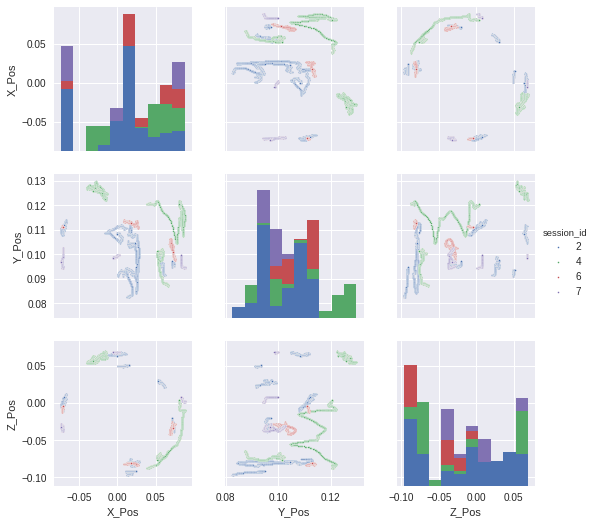

In [55]:
sns.pairplot(dfSRB, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={"s": 3}, hue='session_id');

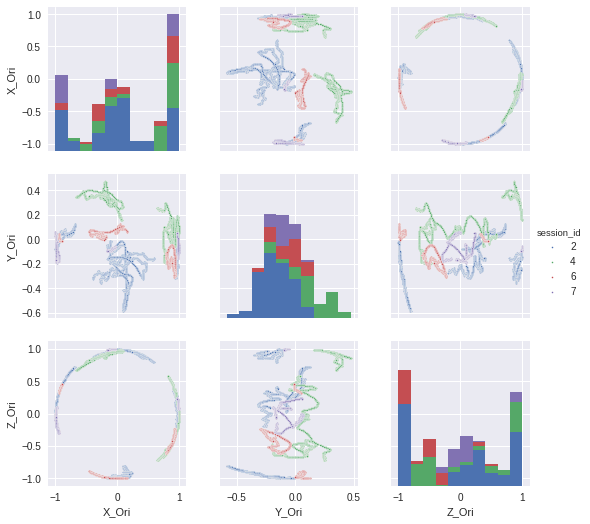

In [56]:
sns.pairplot(dfSRB, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={"s": 3}, hue='session_id');

In [57]:
import datashader as ds
from matplotlib import rcParams, cm


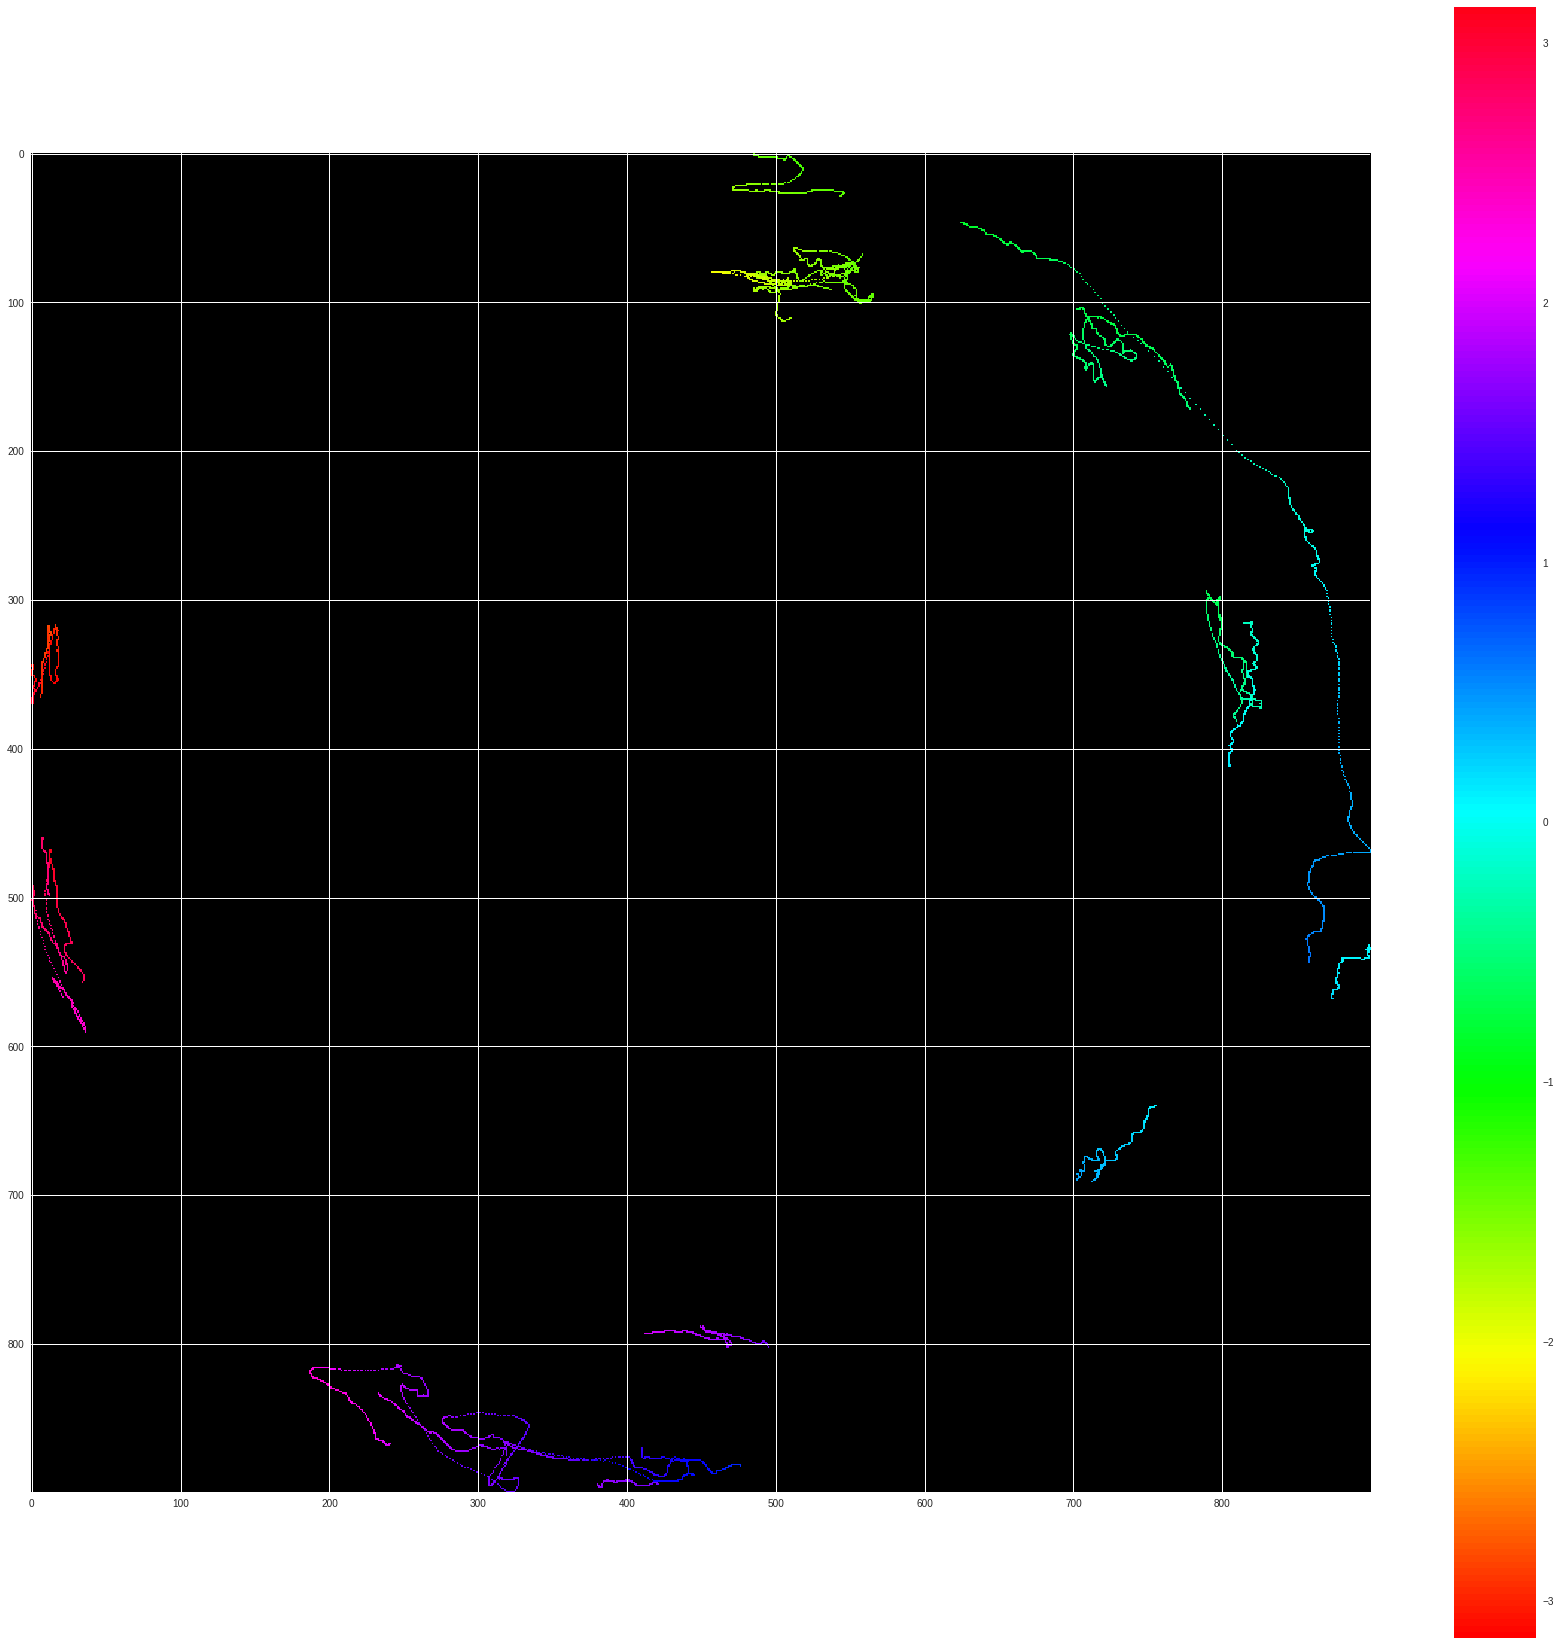

In [58]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()


In [59]:
dfSRB.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,MotiveExpTimeSecs,visible,speed,UM
0,17040,71.000005,0.072329,0.095311,-0.038305,0.941758,-0.274100,-0.194391,2,1,101.662805,-8.831032,4.116140,59.129167,1,-7.0,-9.034888
1,17041,71.004171,0.072389,0.095342,-0.038322,0.942177,-0.273044,-0.193823,2,1,101.624604,-9.169660,3.963093,59.129167,1,-7.0,-9.473965
2,17042,71.008338,0.072449,0.095373,-0.038338,0.942595,-0.272015,-0.193222,2,1,101.584527,-9.617685,3.825573,59.129167,1,-7.0,-9.977606
3,17043,71.012505,0.072538,0.095410,-0.038338,0.943202,-0.270335,-0.192552,2,1,101.538236,-11.108903,3.821506,59.129167,1,-7.0,-10.493959
4,17044,71.016671,0.072630,0.095448,-0.038339,0.943839,-0.268536,-0.191885,2,1,101.491741,-11.160748,3.659302,59.129167,1,-7.0,-10.861097
